<a href="https://colab.research.google.com/github/Anubhavjain24aj/facial-recognition-/blob/master/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMAGE CLASSIFICATION USING CNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_test)

170498071/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [ ]:
y_train_new=np.squeeze(y_train,axis=1)
y_test_new=np.squeeze(y_test,axis=1)
print(y_train_new.shape)
print(y_train_new)


(50000,)
[6 9 9 ... 9 1 1]


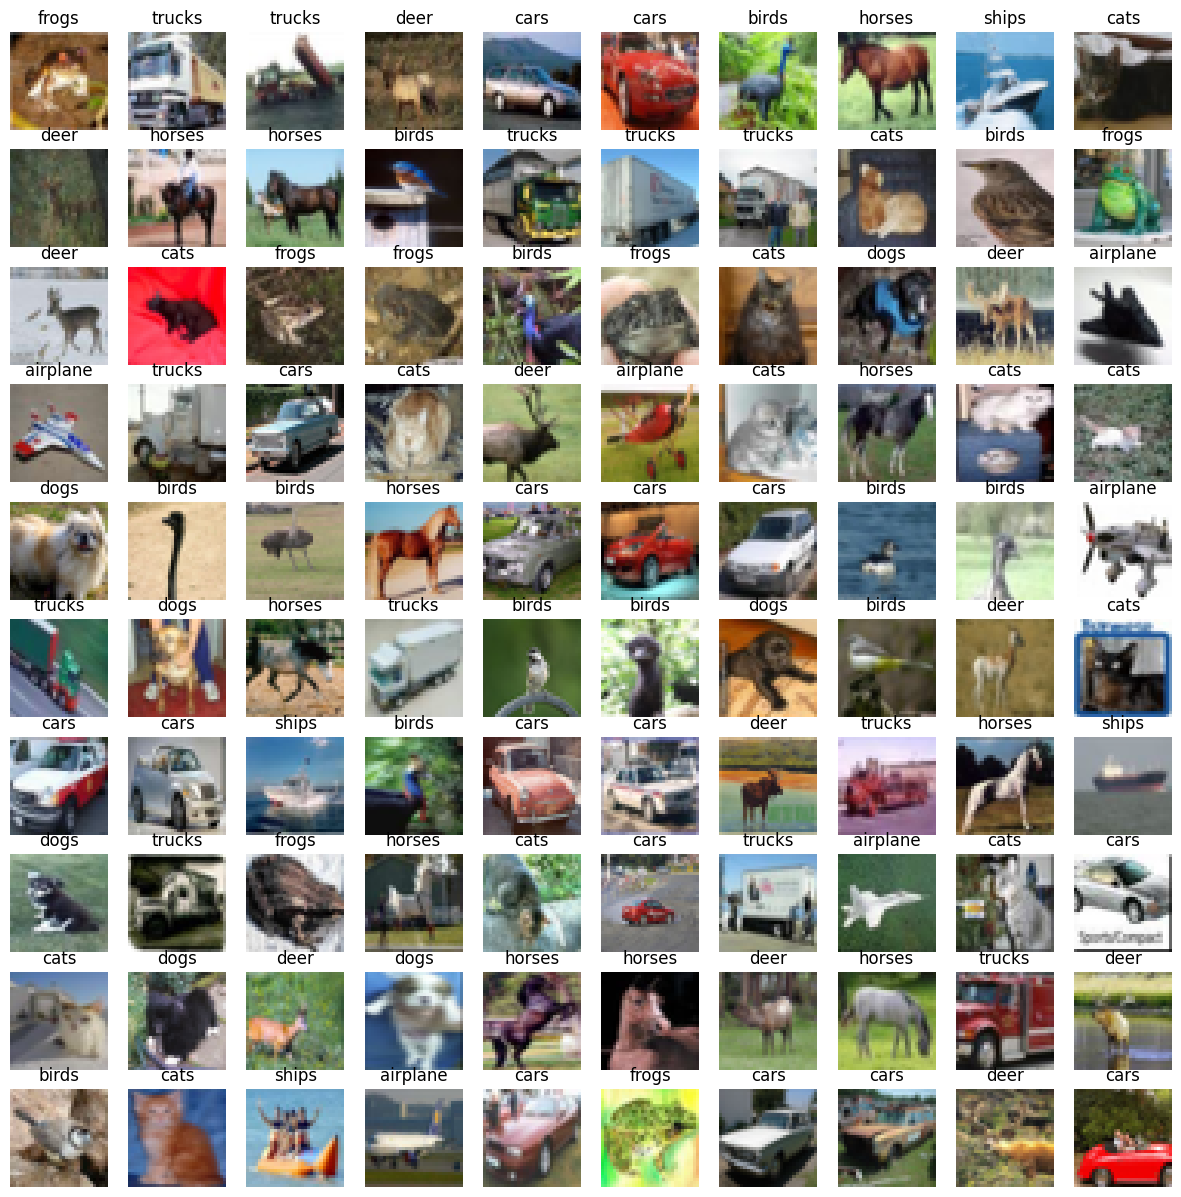

In [ ]:
class_labels = ['airplane','cars', 'birds', 'cats', 'deer',
               'dogs', 'frogs', 'horses', 'ships', 'trucks']

plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.grid(False)
    plt.title(class_labels[y_train_new[i]])


In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
                                 input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
model.compile(optimizer='adam',loss="SparseCategoricalCrossentropy",metrics=['accuracy'])

hist = model.fit(x_train, y_train_new,batch_size=32, epochs=5,verbose=1,
                    validation_split=.3)

Epoch 1/5
1094/1094 [==============================] - 254s 230ms/step - loss: 1.5086 - accuracy: 0.4557 - val_loss: 1.2194 - val_accuracy: 0.5672
Epoch 2/5
1094/1094 [==============================] - 277s 253ms/step - loss: 1.0882 - accuracy: 0.6138 - val_loss: 1.0318 - val_accuracy: 0.6457
Epoch 3/5
1094/1094 [==============================] - 266s 243ms/step - loss: 0.8807 - accuracy: 0.6891 - val_loss: 0.9226 - val_accuracy: 0.6710
Epoch 4/5
1094/1094 [==============================] - 247s 226ms/step - loss: 0.7527 - accuracy: 0.7331 - val_loss: 0.8295 - val_accuracy: 0.7117
Epoch 5/5
1094/1094 [==============================] - 261s 238ms/step - loss: 0.6491 - accuracy: 0.7708 - val_loss: 0.8448 - val_accuracy: 0.7099


In [ ]:
model.save("model_saved")

In [ ]:
reloaded_model=tf.keras.models.load_model('model_saved')

In [ ]:
dict=hist.history
dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

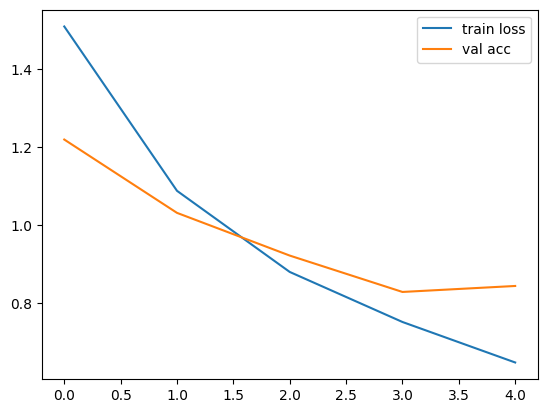

In [ ]:
plt.plot(dict['loss'],label='train loss')
plt.plot(dict['val_loss'],label='val acc')
plt.legend()

In [ ]:
y_pred=model.predict(x_test)

313/313 [==============================] - 16s 49ms/step


In [ ]:
print(y_test_new[0])
print(y_pred[0])
print(np.argmax(y_pred[0]))

3
[2.8280765e-04 1.7466764e-04 2.5189947e-03 3.0209666e-01 7.7825756e-04
 6.2142443e-02 7.7836633e-02 3.1845813e-04 4.9971300e-01 5.4138113e-02]
8


In [ ]:
y_label=np.argmax(y_pred,axis=1)
print(y_label)

[8 8 8 ... 5 0 7]


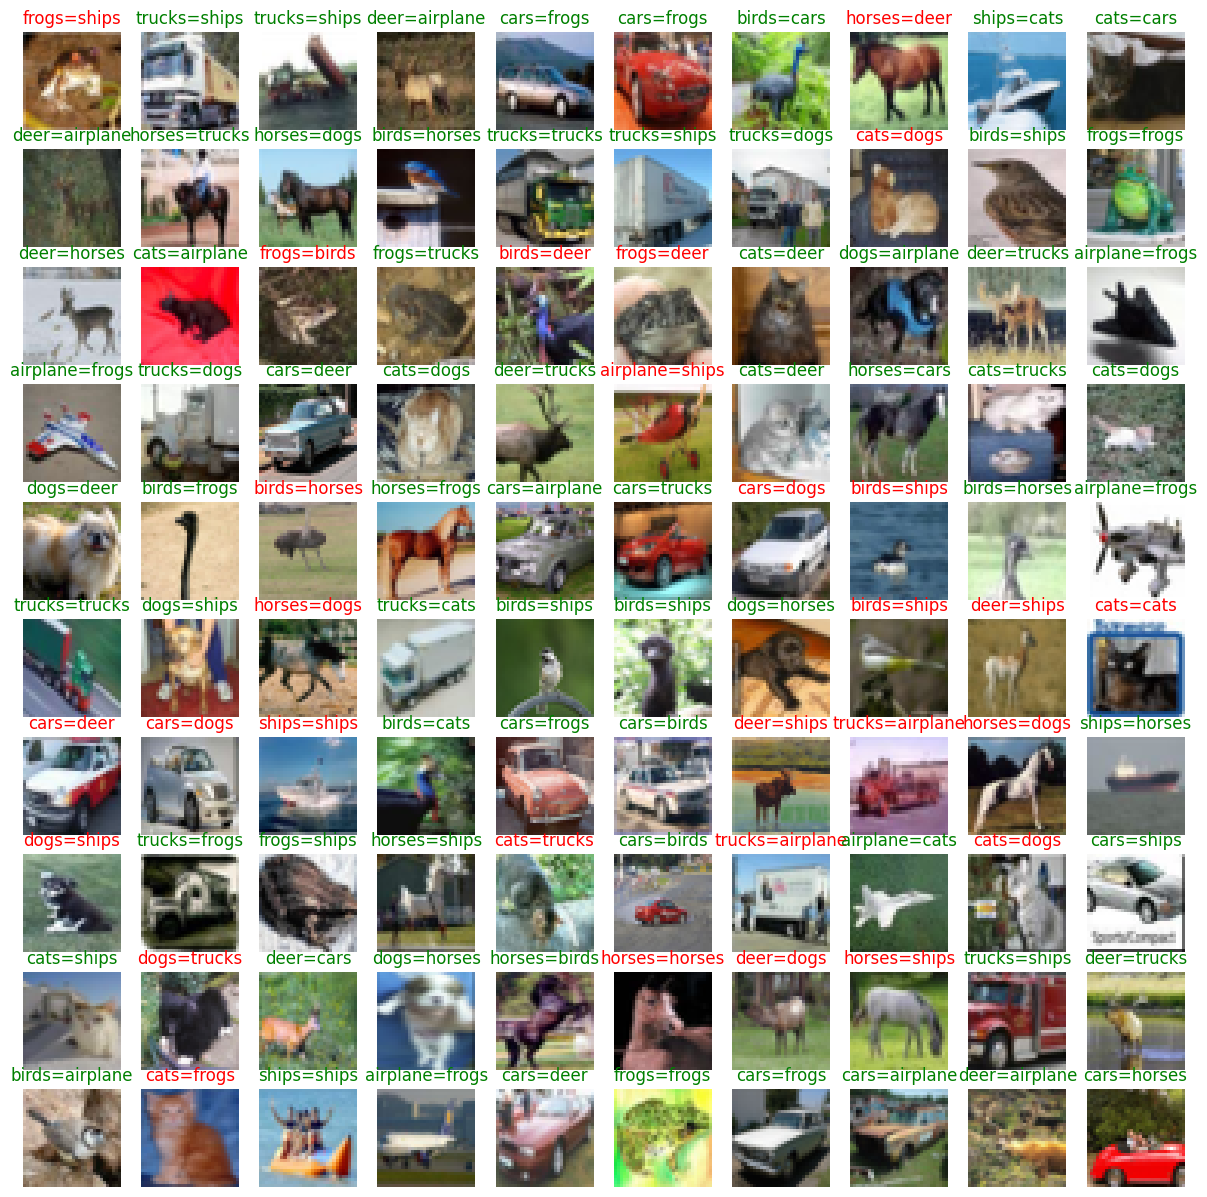

In [ ]:
plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.grid(False)
    if y_test_new[i]==y_label[i]:
      plt.title(class_labels[y_train_new[i]]+'='+class_labels[y_label[i]],c='g')
    else:
      plt.title(class_labels[y_train_new[i]]+'='+class_labels[y_label[i]],c='r')

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test_new)
print(test_acc)

313/313 [==============================] - 16s 52ms/step - loss: 0.8552 - accuracy: 0.7069
0.7069000005722046
